In [ ]:
                                   Fraudlent Transactions Predictions

Business Context:
This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.

Task to be done:
Your task is to execute the process for proactive detection of fraud while answering following questions.

1 Data cleaning including missing values, outliers and multi-collinearity.
2 Describe your fraud detection model in elaboration.
3 How did you select variables to be included in the model?
4 Demonstrate the performance of the model by using best set of tools.
5 What are the key factors that predict fraudulent customer?
6 Do these factors make sense? If yes, How? If not, How not?
7 What kind of prevention should be adopted while company update its infrastructure?
8 Assuming these actions have been implemented, how would you determine if they work?

In [ ]:
!pip install statsmodels

Imprting library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import itertools
from collections import Counter
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("D:\Jupyter_notebook\Fraud.csv")
df.head()

Data Prerocessing

In [19]:
df.shape

(6362620, 11)

In [20]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [22]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

In [23]:
# Number of fraud and legitimate transactions
fraud = len(df[df['isFraud'] == 1])
legit = len(df[df['isFraud'] == 0])

print("Number of Fraud transactions: ", fraud)
print("Number of Legit transactions: ", legit)

Number of Fraud transactions:  8213
Number of Legit transactions:  6354407


These results prove that this is a highly unbalanced data as Number of Fraud transactions is 8213 and Number of Legit transactions= 6354407. So Random Forest, Decision Trees, XGBoost are good methods for the highly unbalanced data.

In [24]:
# Visualzing the Merchants Data
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


There is no information for oldbalanceDest and newbalanceDest for the Merchants.

In [25]:
# checking correlation
corr = df.corr(numeric_only=True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

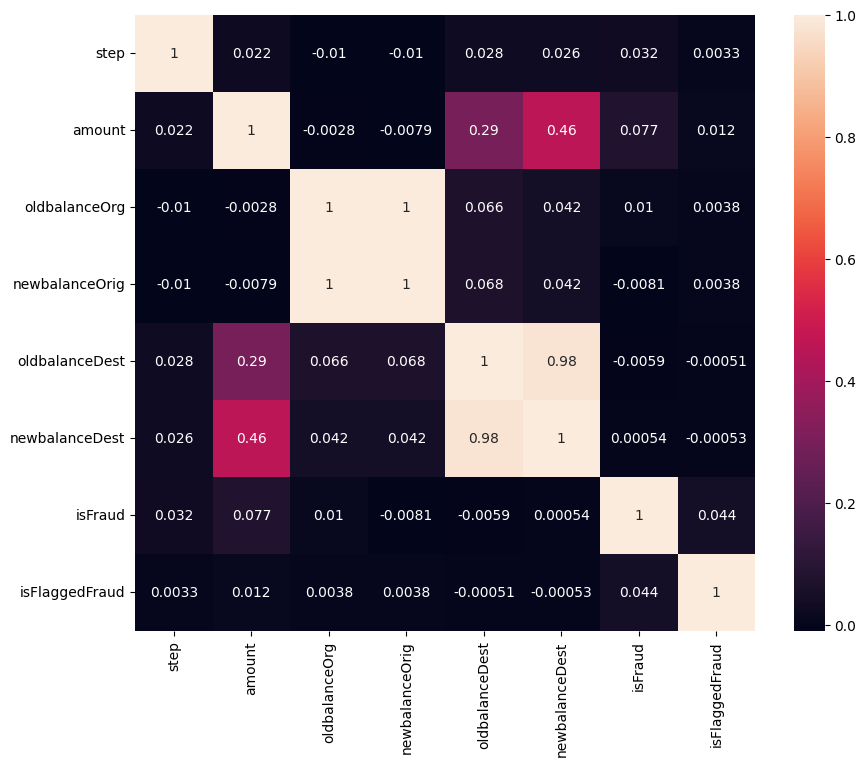

In [26]:
# plotting correlation using heatmap
sns.heatmap(data=corr, annot=True)

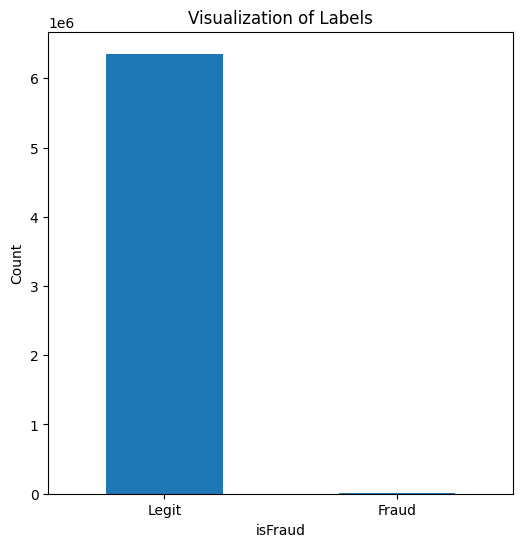

In [27]:
# plotting bar chart for legit & fraud transaction
plt.figure(figsize=(6,6))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Feature Engineering

In [28]:
# create a copy of the original dataframe
df_new = df.copy()
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [29]:
# check object datatypes
objList = df_new.select_dtypes(include = "object").columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


Label Encoding

In [30]:
# encode the objects
le = LabelEncoder()

for f in objList:
    df_new[f] = le.fit_transform(df_new[f].astype(str))

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [31]:
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0





Multicollinearity



In [32]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df_new)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [ ]:

We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. 
Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [33]:
# Ensure the columns exist before performing operations
if 'oldbalanceOrg' in df_new.columns and 'newbalanceOrig' in df_new.columns and \
   'oldbalanceDest' in df_new.columns and 'newbalanceDest' in df_new.columns:
    
    # Creating new features to capture the change in balances and transaction paths
    df_new['Actual_amount_orig'] = df_new['oldbalanceOrg'] - df_new['newbalanceOrig']
    df_new['Actual_amount_dest'] = df_new['oldbalanceDest'] - df_new['newbalanceDest']
    df_new['TransactionPath'] = df_new['nameOrig'] + df_new['nameDest']
    
    # Dropping columns after creating new features
    new_df = df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'], axis=1)
    
    # Calculating VIF
    calc_vif(new_df)
else:
    print("One or more columns do not exist in the DataFrame.")


<Axes: >

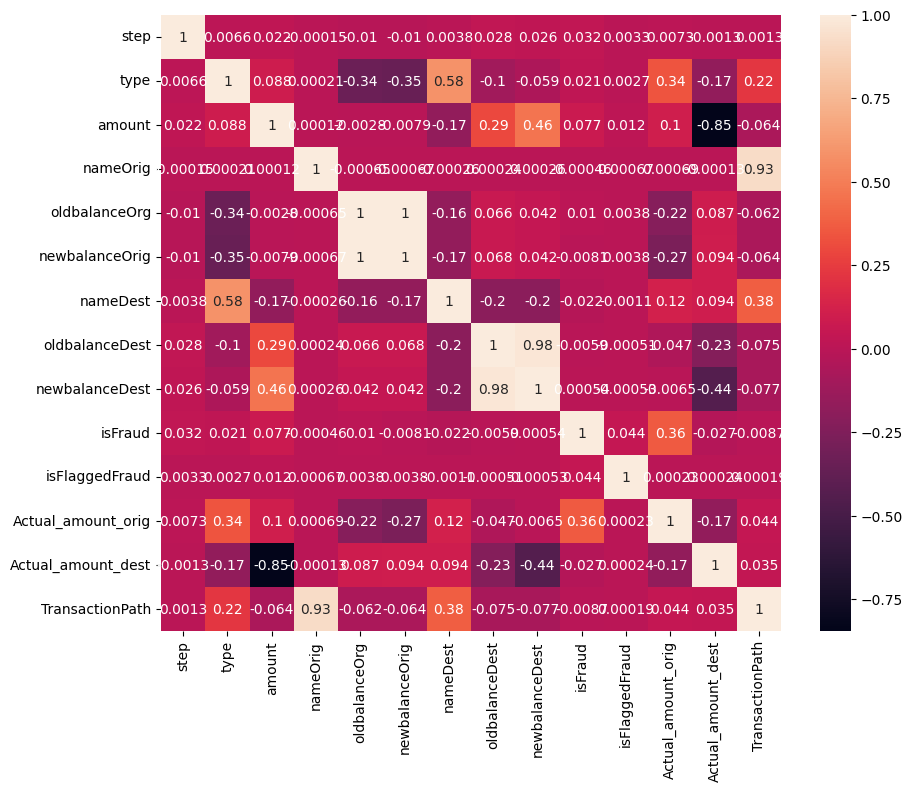

In [34]:
# new correlation heatmap
corr=df_new.corr()

sns.heatmap(corr,annot=True)

How did you select variables to be included in the model?
    Using the VIF values and correlation heatmap. We just need to check if there are any 
    two attributes highly correlated to each other and then drop the one which is less 
    correlated to the isFraud Attribute.


ML Model Building

Scaling the Data

In [35]:
# scale the dataset
scaler = StandardScaler()
df_new["NormalizedAmount"] = scaler.fit_transform(df_new["amount"].values.reshape(-1, 1))
df_new.drop(["amount"], inplace= True, axis= 1)

Y = df_new["isFraud"]
X = df_new.drop(["isFraud"], axis= 1)

Splitting the Data

In [36]:
# split the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 13)
Shape of X_test:  (1908786, 13)


In [37]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dt = dtc.predict(X_test)
dtc_score = dtc.score(X_test, Y_test) * 100

In [38]:
# Random Forest
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, Y_train)

Y_pred_rf = rfc.predict(X_test)
rfc_score = rfc.score(X_test, Y_test) * 100

In [39]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)
xgb_score = xgb.score(X_test, Y_test) * 100

In [40]:
print("Decision Tree Score: ", dtc_score)
print("Random Forest Score: ", rfc_score)
print("XGBoost Score      : ", xgb_score)

Decision Tree Score:  99.96746623246399
Random Forest Score:  99.97060959164621
XGBoost Score      :  99.97663436341215


In [41]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - XGB

print("TP,FP,TN,FN - XGBoost")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_xgb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 2106
False Positives: 292
True Negatives: 1906059
False Negatives: 329
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1920
False Positives: 46
True Negatives: 1906305
False Negatives: 515
----------------------------------------------------------------------------------------
TP,FP,TN,FN - XGBoost
True Positives: 2078
False Positives: 89
True Negatives: 1906262
False Negatives: 357


In [ ]:
* TP(Decision Tree) ~ TP(Random Forest) ~ TP(XGBoost) so no competetion here.
* FP(Decision Tree) >> FP(Random Forest) >> FP(XGBoost) - XGBoost has an edge here.
* TN(Decision Tree) < TN(Random Forest) < TN(XGBoost) - Random Forest is better here too
* FN(Decision Tree) ~ FN(Random Forest) ~ FN(XGBoost)

* XGBoost Classifier works more good in this scenario.

In [42]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("----------------------------------------------------------------------------------------")

# confusion matrix - XGB

confusion_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb.round())
print('Confusion Matrix - XGBoost')
print(confusion_matrix_xgb)

Confusion Matrix - Decision Tree
[[1906059     292]
 [    329    2106]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906305      46]
 [    515    1920]]
----------------------------------------------------------------------------------------
Confusion Matrix - XGBoost
[[1906262      89]
 [    357    2078]]


In [43]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

# classification report - XGB

classification_report_xgb = classification_report(Y_test, Y_pred_xgb)
print("Classification Report - XGBoost")
print(classification_report_xgb)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.86      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.79      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - XGBoost
              precision    recall  f1-score   support

     

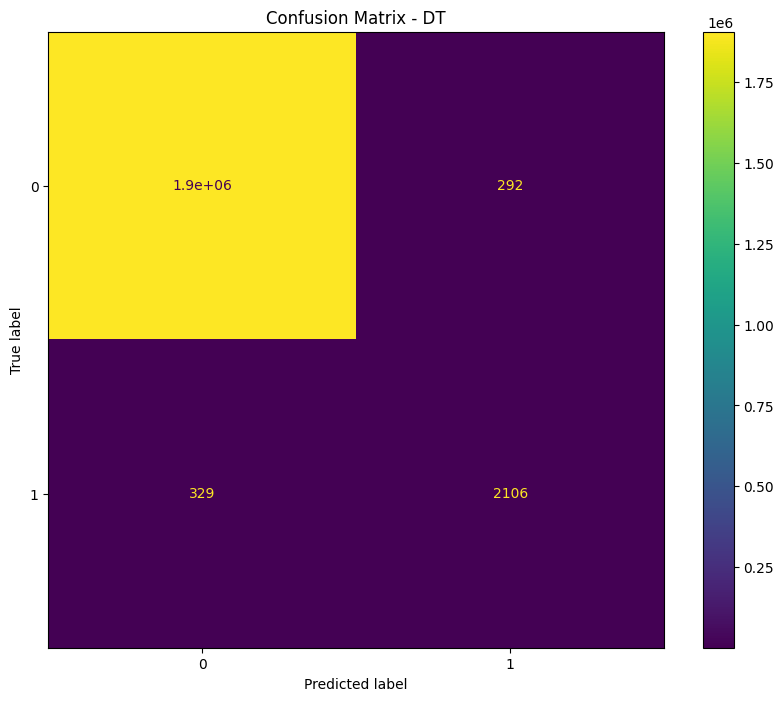

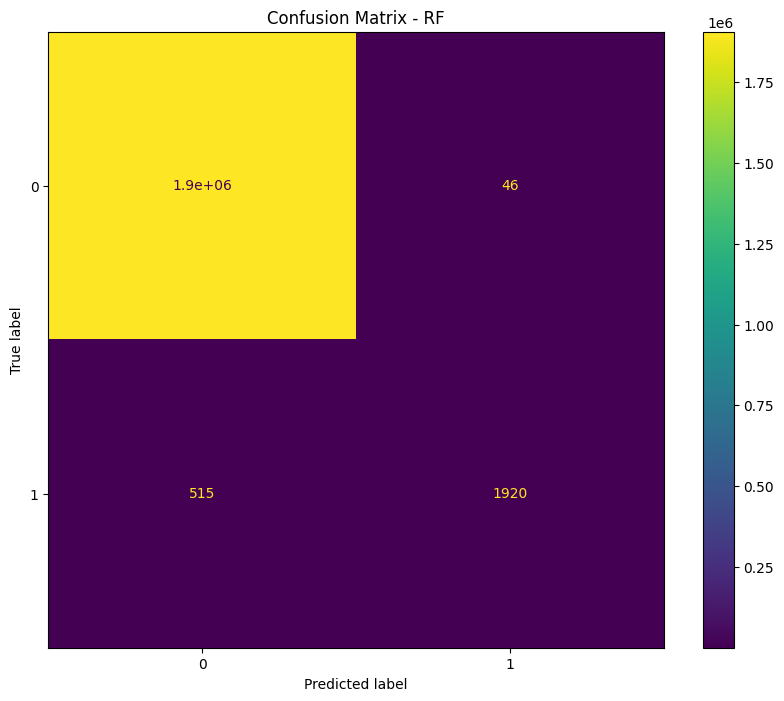

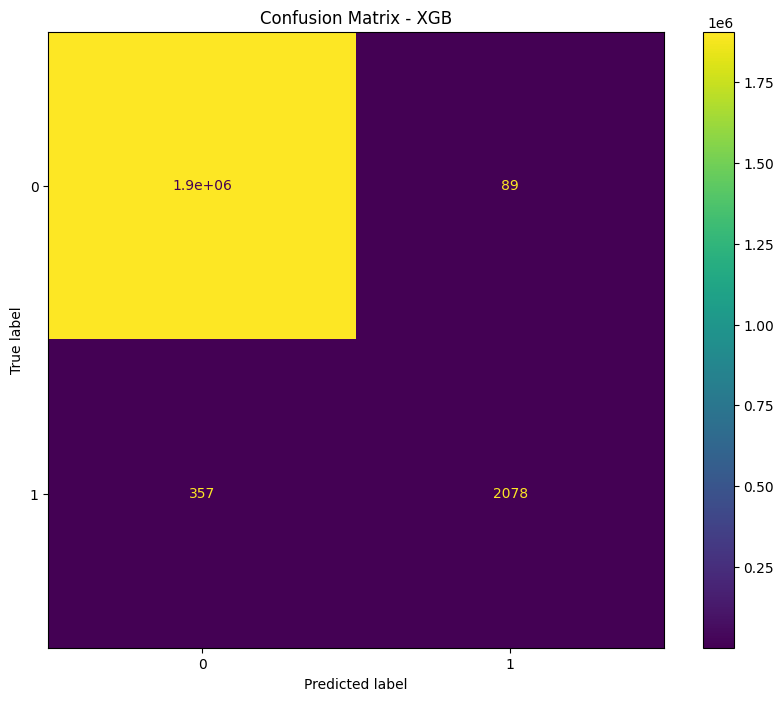

In [44]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

# visualising confusion matrix - XGB
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb)
disp.plot()
plt.title('Confusion Matrix - XGB')
plt.show()

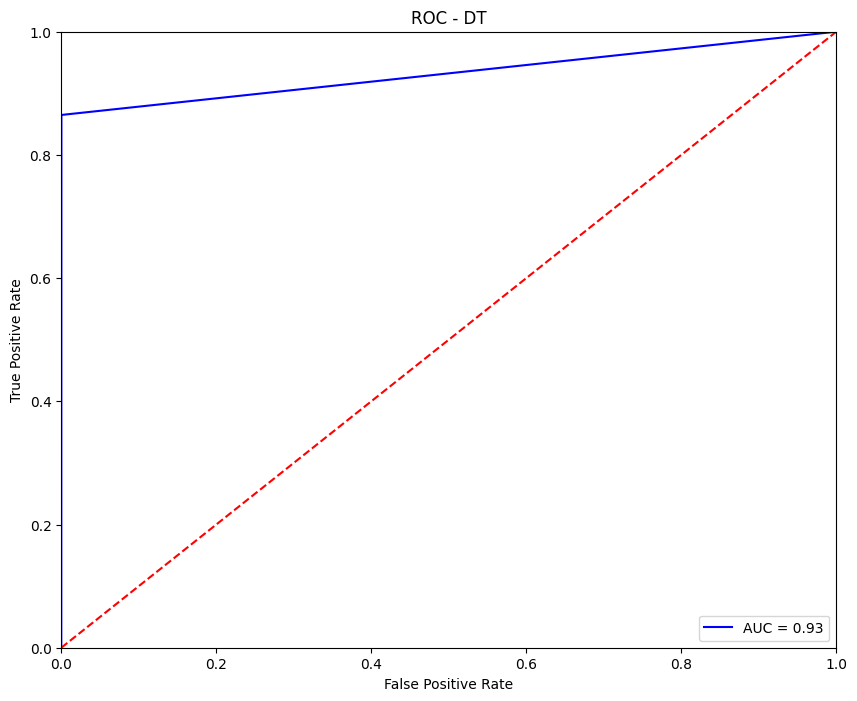

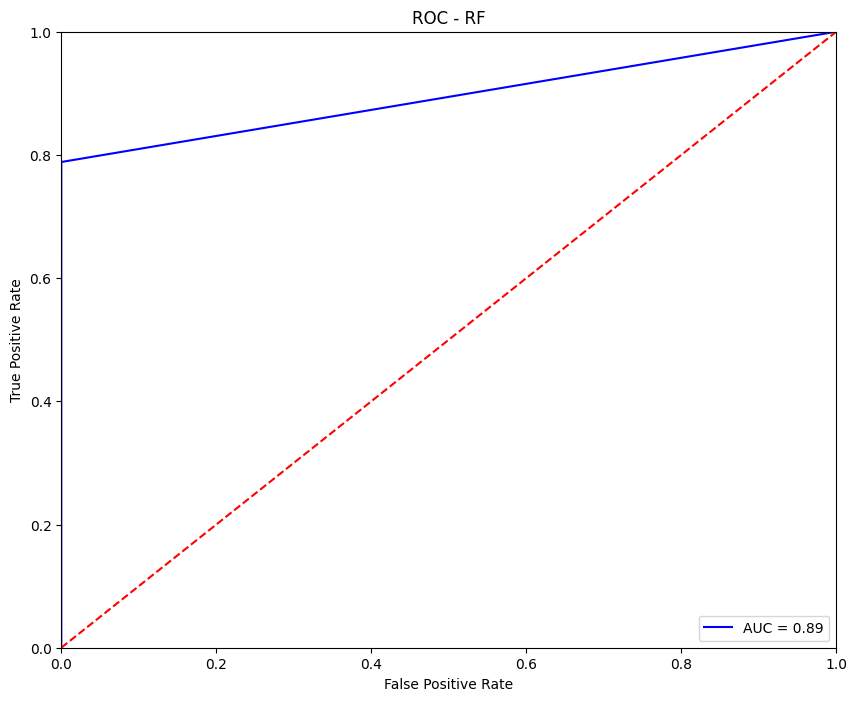

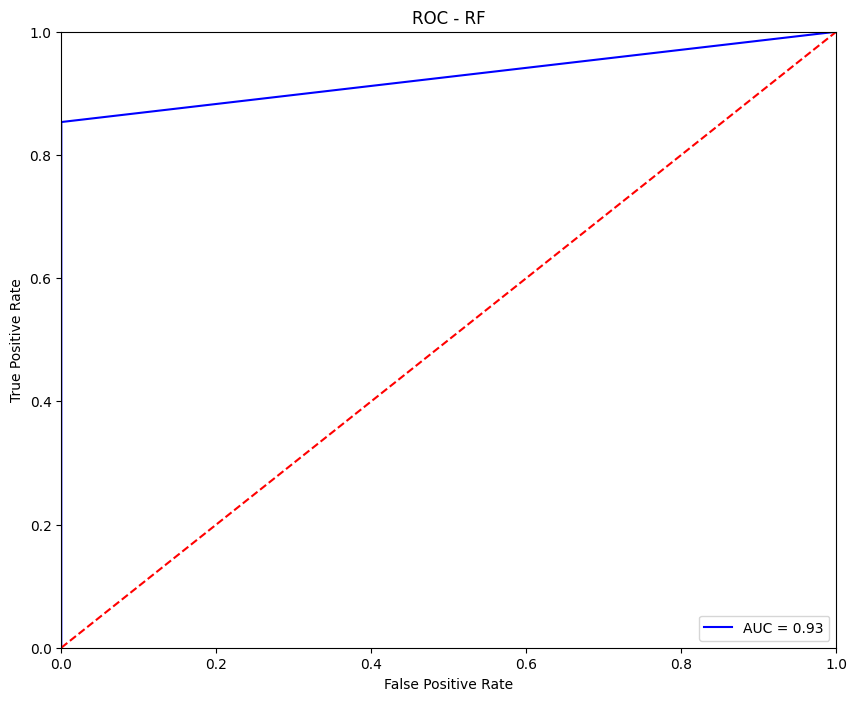

In [45]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - XGB
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()